<a href="https://colab.research.google.com/github/2alstj/AI-Pythoch/blob/main/MultiLayer_Perceptron_MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch    1/3 Cost : 0.094515
Epoch    2/3 Cost : 0.058491
Epoch    3/3 Cost : 0.438809
Accuracy : 9570/10000 (96%)
Result : 2
Correct Answer is 2


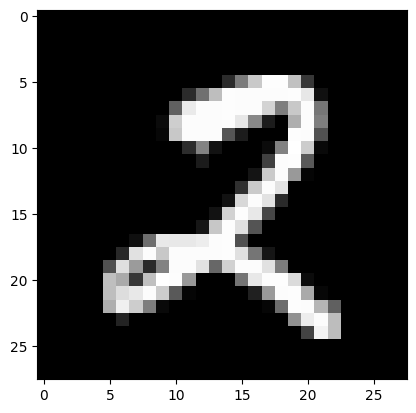

In [18]:
# Data Load
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn
from torch import optim

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist.data / 255 # 0 ~ 255 -> 0 ~ 1 : Increased learning efficiency
y = mnist.target.astype(np.int8)

# Data Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

# Conversion Tensor
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# TensorDataSet
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# DataLoader
loader_train = DataLoader(ds_train, batch_size = 64, shuffle = True)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle = False)

#model defination
model = nn.Sequential(
  nn.Linear(28 * 28 * 1, 100),
  nn.ReLU(),
  nn.Linear(100, 100),
  nn.ReLU(),
  nn.Linear(100, 10)
)

# Cost function
loss_fn = nn.CrossEntropyLoss()

# Select Optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.01)

# epoch
epochs = 3

for epoch in range(epochs):
  for data, targets in loader_train:
    y_pred = model(data)
    loss = loss_fn(y_pred, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch {:4d}/{} Cost : {:.6f}'.format(epoch + 1, epochs, loss.item()))

#모델을 추론모드로 전환
model.eval()
correct = 0

#minibatch를 하나씩 꺼내 추론을 수행
with torch.no_grad():
  for data, targets in loader_test:
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    correct += predicted.eq(targets.data.view_as(predicted)).sum()

data_num = len(loader_test.dataset)
print('Accuracy : {}/{} ({:.0f}%)'.format(correct, data_num, correct / data_num * 100))

index = 2018

model.eval()
data = X_test[index]
output = model(data)
_,predicted = torch.max(output.data, 0)

print('Result : {}'.format(predicted))

X_test_show = X_test[index].numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap = 'gray')
print('Correct Answer is {:.0f}'.format(y_test[index]))